In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup 
import math
import json
import time
import collections
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
headers ={'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
'Accept-Encoding': 'gzip, deflate, br',
'Accept-Language': 'zh-CN,zh;q=0.9,zh-HK;q=0.8',
'Connection': 'keep-alive',
'Host': 'www.bilibili.com',
'Upgrade-Insecure-Requests': '1',
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36'}

In [4]:
style_id = {'all': -1,'culture': 19,'history': 25,'technology': 27,'explore': 29,'journey': 31,'nature': 34,'food': 39,'military': 988,'animal': 989,'universe': 1201, 'pet': 1202,'society': 1203,'medical': 1204,'disaster': 1205,'crime': 1205,'mystery': 1205,'sport': 1205 } 

In [5]:
producer_id  = {'all': -1,'BBC': 1,'NHK': 2,'SKY': 3,'cctv': 4,'ITV': 5,'history': 6,'discovery': 7,'tv': 8,'homemade': 9,'ZDF': 10,'Cooperation': 11,'domestic': 12,'foreign': 13}

In [6]:
year = {'all' :-1,'2019' :'2009','2018' :'2018','2017' :'2017','2016' :'2016','2015' :'2015','2014-2010' :'2014-2010','2009-2005' :'2009-2005','2004-2000' :'2004-2000','90s' :'90年代','80s' :'80年代','before': '更早'}

In [7]:
def get_url(style_id = style_id['all'],producer_id = -1,year = -1,page = 1 ):
    url = r'https://bangumi.bilibili.com/media/web_api/search/result?style_id={0}&producer_id={1}&year={2}&order=2&st=3&sort=0&page={3}&season_type=5&pagesize=20'.format(style_id ,producer_id,year,page)
    return url

In [8]:
page_num = 0
page_all = 0
drama_frame = []
while(page_num <= page_all):
    r = requests.get(get_url(page =  page_num+1))
    page_num += 1
    drama_dict = eval(r.text)
    drama_data = drama_dict['result']['data']
        
    if page_all == 0:
        drama_page = drama_dict['result']['page']
        page_all = math.ceil(drama_page['total']/drama_page['size'])

    for drama in drama_data:
        try:
            drama_frame.append([drama['title'],time.localtime(drama['order']['pub_date']).tm_year,drama['season_id']])
        except:
            pass

In [9]:
drama_table = pd.DataFrame(drama_frame,columns = ['title','years','season_id'])

In [10]:
drama_table.head(5)

,title,years,season_id
0,非自然死亡,2018,24053
1,通灵妃,2019,31778
2,地下交通站,2007,20999
3,天地争霸美猴王,1998,24976
4,铁齿铜牙纪晓岚,2000,20710


In [11]:
def get_information(table):
    url = r'https://bangumi.bilibili.com/view/web_api/season?season_id={0}'.format(table['season_id'])
    print(url)
    r = requests.get(url)
    try:
        info = eval(r.text)['result']
        table['danmakus'] = info['stat']['danmakus']
        table['favorites'] = info['stat']['favorites']
        table['views'] = info['stat']['views']
        table['coins'] = info['stat']['coins']
        table['area'] = info['areas'][0]['name']
        table['style'] = info['style']
    except:
        pass
    return table

In [12]:
drama_information = drama_table.apply(get_information, axis = 1)

https://bangumi.bilibili.com/view/web_api/season?season_id=24053
https://bangumi.bilibili.com/view/web_api/season?season_id=24053
https://bangumi.bilibili.com/view/web_api/season?season_id=31778
https://bangumi.bilibili.com/view/web_api/season?season_id=20999
https://bangumi.bilibili.com/view/web_api/season?season_id=24976
https://bangumi.bilibili.com/view/web_api/season?season_id=20710
https://bangumi.bilibili.com/view/web_api/season?season_id=27049
https://bangumi.bilibili.com/view/web_api/season?season_id=20178
https://bangumi.bilibili.com/view/web_api/season?season_id=28572
https://bangumi.bilibili.com/view/web_api/season?season_id=22653
https://bangumi.bilibili.com/view/web_api/season?season_id=20711
https://bangumi.bilibili.com/view/web_api/season?season_id=27050
https://bangumi.bilibili.com/view/web_api/season?season_id=27047
https://bangumi.bilibili.com/view/web_api/season?season_id=25365
https://bangumi.bilibili.com/view/web_api/season?season_id=26487
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=21520
https://bangumi.bilibili.com/view/web_api/season?season_id=23798
https://bangumi.bilibili.com/view/web_api/season?season_id=20105
https://bangumi.bilibili.com/view/web_api/season?season_id=23124
https://bangumi.bilibili.com/view/web_api/season?season_id=33064
https://bangumi.bilibili.com/view/web_api/season?season_id=27817
https://bangumi.bilibili.com/view/web_api/season?season_id=20276
https://bangumi.bilibili.com/view/web_api/season?season_id=20927
https://bangumi.bilibili.com/view/web_api/season?season_id=24950
https://bangumi.bilibili.com/view/web_api/season?season_id=21522
https://bangumi.bilibili.com/view/web_api/season?season_id=28316
https://bangumi.bilibili.com/view/web_api/season?season_id=20989
https://bangumi.bilibili.com/view/web_api/season?season_id=20233
https://bangumi.bilibili.com/view/web_api/season?season_id=21452
https://bangumi.bilibili.com/view/web_api/season?season_id=20080
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=23949
https://bangumi.bilibili.com/view/web_api/season?season_id=25180
https://bangumi.bilibili.com/view/web_api/season?season_id=20073
https://bangumi.bilibili.com/view/web_api/season?season_id=33150
https://bangumi.bilibili.com/view/web_api/season?season_id=27836
https://bangumi.bilibili.com/view/web_api/season?season_id=22072
https://bangumi.bilibili.com/view/web_api/season?season_id=20135
https://bangumi.bilibili.com/view/web_api/season?season_id=22112
https://bangumi.bilibili.com/view/web_api/season?season_id=21296
https://bangumi.bilibili.com/view/web_api/season?season_id=20079
https://bangumi.bilibili.com/view/web_api/season?season_id=28152
https://bangumi.bilibili.com/view/web_api/season?season_id=21442
https://bangumi.bilibili.com/view/web_api/season?season_id=26772
https://bangumi.bilibili.com/view/web_api/season?season_id=25962
https://bangumi.bilibili.com/view/web_api/season?season_id=22420
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=26986
https://bangumi.bilibili.com/view/web_api/season?season_id=25890
https://bangumi.bilibili.com/view/web_api/season?season_id=23901
https://bangumi.bilibili.com/view/web_api/season?season_id=20224
https://bangumi.bilibili.com/view/web_api/season?season_id=21210
https://bangumi.bilibili.com/view/web_api/season?season_id=28240
https://bangumi.bilibili.com/view/web_api/season?season_id=22475
https://bangumi.bilibili.com/view/web_api/season?season_id=23339
https://bangumi.bilibili.com/view/web_api/season?season_id=28294
https://bangumi.bilibili.com/view/web_api/season?season_id=23995
https://bangumi.bilibili.com/view/web_api/season?season_id=27079
https://bangumi.bilibili.com/view/web_api/season?season_id=20223
https://bangumi.bilibili.com/view/web_api/season?season_id=25913
https://bangumi.bilibili.com/view/web_api/season?season_id=21995
https://bangumi.bilibili.com/view/web_api/season?season_id=23938
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=23209
https://bangumi.bilibili.com/view/web_api/season?season_id=27799
https://bangumi.bilibili.com/view/web_api/season?season_id=26805
https://bangumi.bilibili.com/view/web_api/season?season_id=22676
https://bangumi.bilibili.com/view/web_api/season?season_id=24746
https://bangumi.bilibili.com/view/web_api/season?season_id=32857
https://bangumi.bilibili.com/view/web_api/season?season_id=22675
https://bangumi.bilibili.com/view/web_api/season?season_id=21078
https://bangumi.bilibili.com/view/web_api/season?season_id=20705
https://bangumi.bilibili.com/view/web_api/season?season_id=32299
https://bangumi.bilibili.com/view/web_api/season?season_id=23026
https://bangumi.bilibili.com/view/web_api/season?season_id=23767
https://bangumi.bilibili.com/view/web_api/season?season_id=27888
https://bangumi.bilibili.com/view/web_api/season?season_id=23936
https://bangumi.bilibili.com/view/web_api/season?season_id=23138
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=26860
https://bangumi.bilibili.com/view/web_api/season?season_id=25265
https://bangumi.bilibili.com/view/web_api/season?season_id=22552
https://bangumi.bilibili.com/view/web_api/season?season_id=28285
https://bangumi.bilibili.com/view/web_api/season?season_id=23890
https://bangumi.bilibili.com/view/web_api/season?season_id=22718
https://bangumi.bilibili.com/view/web_api/season?season_id=21586
https://bangumi.bilibili.com/view/web_api/season?season_id=23132
https://bangumi.bilibili.com/view/web_api/season?season_id=23485
https://bangumi.bilibili.com/view/web_api/season?season_id=24003
https://bangumi.bilibili.com/view/web_api/season?season_id=20016
https://bangumi.bilibili.com/view/web_api/season?season_id=23389
https://bangumi.bilibili.com/view/web_api/season?season_id=22727
https://bangumi.bilibili.com/view/web_api/season?season_id=23191
https://bangumi.bilibili.com/view/web_api/season?season_id=22617
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=21604
https://bangumi.bilibili.com/view/web_api/season?season_id=20288
https://bangumi.bilibili.com/view/web_api/season?season_id=21355
https://bangumi.bilibili.com/view/web_api/season?season_id=20809
https://bangumi.bilibili.com/view/web_api/season?season_id=20277
https://bangumi.bilibili.com/view/web_api/season?season_id=31887
https://bangumi.bilibili.com/view/web_api/season?season_id=33224
https://bangumi.bilibili.com/view/web_api/season?season_id=20502
https://bangumi.bilibili.com/view/web_api/season?season_id=23140
https://bangumi.bilibili.com/view/web_api/season?season_id=24202
https://bangumi.bilibili.com/view/web_api/season?season_id=24180
https://bangumi.bilibili.com/view/web_api/season?season_id=21879
https://bangumi.bilibili.com/view/web_api/season?season_id=25907
https://bangumi.bilibili.com/view/web_api/season?season_id=23915
https://bangumi.bilibili.com/view/web_api/season?season_id=29144
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=22168
https://bangumi.bilibili.com/view/web_api/season?season_id=22209
https://bangumi.bilibili.com/view/web_api/season?season_id=22997
https://bangumi.bilibili.com/view/web_api/season?season_id=23351
https://bangumi.bilibili.com/view/web_api/season?season_id=24000
https://bangumi.bilibili.com/view/web_api/season?season_id=20810
https://bangumi.bilibili.com/view/web_api/season?season_id=25799
https://bangumi.bilibili.com/view/web_api/season?season_id=21457
https://bangumi.bilibili.com/view/web_api/season?season_id=21433
https://bangumi.bilibili.com/view/web_api/season?season_id=27830
https://bangumi.bilibili.com/view/web_api/season?season_id=27835
https://bangumi.bilibili.com/view/web_api/season?season_id=21243
https://bangumi.bilibili.com/view/web_api/season?season_id=23939
https://bangumi.bilibili.com/view/web_api/season?season_id=27967
https://bangumi.bilibili.com/view/web_api/season?season_id=22545
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=32437
https://bangumi.bilibili.com/view/web_api/season?season_id=21987
https://bangumi.bilibili.com/view/web_api/season?season_id=25396
https://bangumi.bilibili.com/view/web_api/season?season_id=21055
https://bangumi.bilibili.com/view/web_api/season?season_id=22656
https://bangumi.bilibili.com/view/web_api/season?season_id=22553
https://bangumi.bilibili.com/view/web_api/season?season_id=23305
https://bangumi.bilibili.com/view/web_api/season?season_id=22421
https://bangumi.bilibili.com/view/web_api/season?season_id=21254
https://bangumi.bilibili.com/view/web_api/season?season_id=24094
https://bangumi.bilibili.com/view/web_api/season?season_id=23721
https://bangumi.bilibili.com/view/web_api/season?season_id=20730
https://bangumi.bilibili.com/view/web_api/season?season_id=21087
https://bangumi.bilibili.com/view/web_api/season?season_id=23078
https://bangumi.bilibili.com/view/web_api/season?season_id=23066
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=22883
https://bangumi.bilibili.com/view/web_api/season?season_id=20031
https://bangumi.bilibili.com/view/web_api/season?season_id=22350
https://bangumi.bilibili.com/view/web_api/season?season_id=24129
https://bangumi.bilibili.com/view/web_api/season?season_id=25830
https://bangumi.bilibili.com/view/web_api/season?season_id=23369
https://bangumi.bilibili.com/view/web_api/season?season_id=20215
https://bangumi.bilibili.com/view/web_api/season?season_id=23179
https://bangumi.bilibili.com/view/web_api/season?season_id=22639
https://bangumi.bilibili.com/view/web_api/season?season_id=24073
https://bangumi.bilibili.com/view/web_api/season?season_id=33437
https://bangumi.bilibili.com/view/web_api/season?season_id=22928
https://bangumi.bilibili.com/view/web_api/season?season_id=20294
https://bangumi.bilibili.com/view/web_api/season?season_id=21901
https://bangumi.bilibili.com/view/web_api/season?season_id=22394
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=31876
https://bangumi.bilibili.com/view/web_api/season?season_id=27389
https://bangumi.bilibili.com/view/web_api/season?season_id=21614
https://bangumi.bilibili.com/view/web_api/season?season_id=25038
https://bangumi.bilibili.com/view/web_api/season?season_id=21952
https://bangumi.bilibili.com/view/web_api/season?season_id=22774
https://bangumi.bilibili.com/view/web_api/season?season_id=28027
https://bangumi.bilibili.com/view/web_api/season?season_id=21687
https://bangumi.bilibili.com/view/web_api/season?season_id=28287
https://bangumi.bilibili.com/view/web_api/season?season_id=22080
https://bangumi.bilibili.com/view/web_api/season?season_id=22589
https://bangumi.bilibili.com/view/web_api/season?season_id=22378
https://bangumi.bilibili.com/view/web_api/season?season_id=22866
https://bangumi.bilibili.com/view/web_api/season?season_id=23363
https://bangumi.bilibili.com/view/web_api/season?season_id=23029
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=20247
https://bangumi.bilibili.com/view/web_api/season?season_id=23002
https://bangumi.bilibili.com/view/web_api/season?season_id=22989
https://bangumi.bilibili.com/view/web_api/season?season_id=21902
https://bangumi.bilibili.com/view/web_api/season?season_id=27748
https://bangumi.bilibili.com/view/web_api/season?season_id=21863
https://bangumi.bilibili.com/view/web_api/season?season_id=23042
https://bangumi.bilibili.com/view/web_api/season?season_id=23272
https://bangumi.bilibili.com/view/web_api/season?season_id=22779
https://bangumi.bilibili.com/view/web_api/season?season_id=21131
https://bangumi.bilibili.com/view/web_api/season?season_id=25037
https://bangumi.bilibili.com/view/web_api/season?season_id=22705
https://bangumi.bilibili.com/view/web_api/season?season_id=23466
https://bangumi.bilibili.com/view/web_api/season?season_id=22855
https://bangumi.bilibili.com/view/web_api/season?season_id=22987
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=28094
https://bangumi.bilibili.com/view/web_api/season?season_id=22499
https://bangumi.bilibili.com/view/web_api/season?season_id=33257
https://bangumi.bilibili.com/view/web_api/season?season_id=22902
https://bangumi.bilibili.com/view/web_api/season?season_id=25934
https://bangumi.bilibili.com/view/web_api/season?season_id=21947
https://bangumi.bilibili.com/view/web_api/season?season_id=20250
https://bangumi.bilibili.com/view/web_api/season?season_id=22144
https://bangumi.bilibili.com/view/web_api/season?season_id=23752
https://bangumi.bilibili.com/view/web_api/season?season_id=22157
https://bangumi.bilibili.com/view/web_api/season?season_id=22479
https://bangumi.bilibili.com/view/web_api/season?season_id=22986
https://bangumi.bilibili.com/view/web_api/season?season_id=21583
https://bangumi.bilibili.com/view/web_api/season?season_id=32293
https://bangumi.bilibili.com/view/web_api/season?season_id=22919
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=24060
https://bangumi.bilibili.com/view/web_api/season?season_id=25034
https://bangumi.bilibili.com/view/web_api/season?season_id=22766
https://bangumi.bilibili.com/view/web_api/season?season_id=23679
https://bangumi.bilibili.com/view/web_api/season?season_id=22567
https://bangumi.bilibili.com/view/web_api/season?season_id=23213
https://bangumi.bilibili.com/view/web_api/season?season_id=23003
https://bangumi.bilibili.com/view/web_api/season?season_id=23229
https://bangumi.bilibili.com/view/web_api/season?season_id=22664
https://bangumi.bilibili.com/view/web_api/season?season_id=32791
https://bangumi.bilibili.com/view/web_api/season?season_id=31889
https://bangumi.bilibili.com/view/web_api/season?season_id=24120
https://bangumi.bilibili.com/view/web_api/season?season_id=21529
https://bangumi.bilibili.com/view/web_api/season?season_id=22522
https://bangumi.bilibili.com/view/web_api/season?season_id=22839
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=23972
https://bangumi.bilibili.com/view/web_api/season?season_id=21979
https://bangumi.bilibili.com/view/web_api/season?season_id=22624
https://bangumi.bilibili.com/view/web_api/season?season_id=23682
https://bangumi.bilibili.com/view/web_api/season?season_id=23190
https://bangumi.bilibili.com/view/web_api/season?season_id=20090
https://bangumi.bilibili.com/view/web_api/season?season_id=22651
https://bangumi.bilibili.com/view/web_api/season?season_id=23343
https://bangumi.bilibili.com/view/web_api/season?season_id=22932
https://bangumi.bilibili.com/view/web_api/season?season_id=21853
https://bangumi.bilibili.com/view/web_api/season?season_id=22462
https://bangumi.bilibili.com/view/web_api/season?season_id=29172
https://bangumi.bilibili.com/view/web_api/season?season_id=27963
https://bangumi.bilibili.com/view/web_api/season?season_id=20471
https://bangumi.bilibili.com/view/web_api/season?season_id=21616
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=23615
https://bangumi.bilibili.com/view/web_api/season?season_id=23234
https://bangumi.bilibili.com/view/web_api/season?season_id=22962
https://bangumi.bilibili.com/view/web_api/season?season_id=21906
https://bangumi.bilibili.com/view/web_api/season?season_id=22267
https://bangumi.bilibili.com/view/web_api/season?season_id=27890
https://bangumi.bilibili.com/view/web_api/season?season_id=21946
https://bangumi.bilibili.com/view/web_api/season?season_id=25015
https://bangumi.bilibili.com/view/web_api/season?season_id=22495
https://bangumi.bilibili.com/view/web_api/season?season_id=27977
https://bangumi.bilibili.com/view/web_api/season?season_id=22846
https://bangumi.bilibili.com/view/web_api/season?season_id=23558
https://bangumi.bilibili.com/view/web_api/season?season_id=22914
https://bangumi.bilibili.com/view/web_api/season?season_id=22458
https://bangumi.bilibili.com/view/web_api/season?season_id=23097
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=21865
https://bangumi.bilibili.com/view/web_api/season?season_id=22253
https://bangumi.bilibili.com/view/web_api/season?season_id=24072
https://bangumi.bilibili.com/view/web_api/season?season_id=20542
https://bangumi.bilibili.com/view/web_api/season?season_id=23900
https://bangumi.bilibili.com/view/web_api/season?season_id=28096
https://bangumi.bilibili.com/view/web_api/season?season_id=21907
https://bangumi.bilibili.com/view/web_api/season?season_id=29293
https://bangumi.bilibili.com/view/web_api/season?season_id=29159
https://bangumi.bilibili.com/view/web_api/season?season_id=20544
https://bangumi.bilibili.com/view/web_api/season?season_id=22274
https://bangumi.bilibili.com/view/web_api/season?season_id=28290
https://bangumi.bilibili.com/view/web_api/season?season_id=22029
https://bangumi.bilibili.com/view/web_api/season?season_id=22108
https://bangumi.bilibili.com/view/web_api/season?season_id=26853
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=23562
https://bangumi.bilibili.com/view/web_api/season?season_id=26854
https://bangumi.bilibili.com/view/web_api/season?season_id=22079
https://bangumi.bilibili.com/view/web_api/season?season_id=21928
https://bangumi.bilibili.com/view/web_api/season?season_id=21551
https://bangumi.bilibili.com/view/web_api/season?season_id=32260
https://bangumi.bilibili.com/view/web_api/season?season_id=23700
https://bangumi.bilibili.com/view/web_api/season?season_id=22838
https://bangumi.bilibili.com/view/web_api/season?season_id=21548
https://bangumi.bilibili.com/view/web_api/season?season_id=21611
https://bangumi.bilibili.com/view/web_api/season?season_id=25027
https://bangumi.bilibili.com/view/web_api/season?season_id=22295
https://bangumi.bilibili.com/view/web_api/season?season_id=23009
https://bangumi.bilibili.com/view/web_api/season?season_id=23666
https://bangumi.bilibili.com/view/web_api/season?season_id=21876
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=29131
https://bangumi.bilibili.com/view/web_api/season?season_id=22381
https://bangumi.bilibili.com/view/web_api/season?season_id=21569
https://bangumi.bilibili.com/view/web_api/season?season_id=23139
https://bangumi.bilibili.com/view/web_api/season?season_id=21644
https://bangumi.bilibili.com/view/web_api/season?season_id=21653
https://bangumi.bilibili.com/view/web_api/season?season_id=23587
https://bangumi.bilibili.com/view/web_api/season?season_id=23152
https://bangumi.bilibili.com/view/web_api/season?season_id=23660
https://bangumi.bilibili.com/view/web_api/season?season_id=22393
https://bangumi.bilibili.com/view/web_api/season?season_id=22263
https://bangumi.bilibili.com/view/web_api/season?season_id=21147
https://bangumi.bilibili.com/view/web_api/season?season_id=23707
https://bangumi.bilibili.com/view/web_api/season?season_id=22544
https://bangumi.bilibili.com/view/web_api/season?season_id=23708
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=23456
https://bangumi.bilibili.com/view/web_api/season?season_id=21971
https://bangumi.bilibili.com/view/web_api/season?season_id=22231
https://bangumi.bilibili.com/view/web_api/season?season_id=23518
https://bangumi.bilibili.com/view/web_api/season?season_id=24059
https://bangumi.bilibili.com/view/web_api/season?season_id=21419
https://bangumi.bilibili.com/view/web_api/season?season_id=29132
https://bangumi.bilibili.com/view/web_api/season?season_id=23652
https://bangumi.bilibili.com/view/web_api/season?season_id=22125
https://bangumi.bilibili.com/view/web_api/season?season_id=33254
https://bangumi.bilibili.com/view/web_api/season?season_id=23045
https://bangumi.bilibili.com/view/web_api/season?season_id=22329
https://bangumi.bilibili.com/view/web_api/season?season_id=23173
https://bangumi.bilibili.com/view/web_api/season?season_id=23943
https://bangumi.bilibili.com/view/web_api/season?season_id=29147
https://bangumi.bilibili.

https://bangumi.bilibili.com/view/web_api/season?season_id=29140
https://bangumi.bilibili.com/view/web_api/season?season_id=23353
https://bangumi.bilibili.com/view/web_api/season?season_id=29303
https://bangumi.bilibili.com/view/web_api/season?season_id=23741
https://bangumi.bilibili.com/view/web_api/season?season_id=29166
https://bangumi.bilibili.com/view/web_api/season?season_id=33466
https://bangumi.bilibili.com/view/web_api/season?season_id=24098
https://bangumi.bilibili.com/view/web_api/season?season_id=23697
https://bangumi.bilibili.com/view/web_api/season?season_id=32954
https://bangumi.bilibili.com/view/web_api/season?season_id=21307
https://bangumi.bilibili.com/view/web_api/season?season_id=29287
https://bangumi.bilibili.com/view/web_api/season?season_id=33541
https://bangumi.bilibili.com/view/web_api/season?season_id=23650
https://bangumi.bilibili.com/view/web_api/season?season_id=21532
https://bangumi.bilibili.com/view/web_api/season?season_id=23416
https://bangumi.bilibili.

In [13]:
drama_information['area'] = drama_information['area'].replace('英国','Britain').replace('中国大陆','Mainland China').replace('美国','America').replace('法国','France').replace('日本','Japan').replace('加拿大','Canada').replace('澳大利亚','Australia').replace('德国','German').replace('俄罗斯','Russia').replace('新加坡','Singapore').replace('丹麦','Denmark').replace('西班牙','Spain').replace('中国香港','Hong Kong,China').replace('泰国','Thailand').replace('瑞典','Sweden').replace('中国台湾','Tai Wan,China')

In [14]:
for i in range(len(drama_information['style'])):
    if drama_information['style'][i] is not np.nan:
        drama_information['style'][i] = str(drama_information['style'][i])
        drama_information['style'][i] = drama_information['style'][i].replace('剧情','Plot')
        drama_information['style'][i] = drama_information['style'][i].replace('悬疑','Suspense')
        drama_information['style'][i] = drama_information['style'][i].replace('搞笑','Hilarious')
        drama_information['style'][i] = drama_information['style'][i].replace('青春','Youth')
        drama_information['style'][i] = drama_information['style'][i].replace('奇幻','Fantasy')
        drama_information['style'][i] = drama_information['style'][i].replace('战争','War')
        drama_information['style'][i] = drama_information['style'][i].replace('武侠','Martial')
        drama_information['style'][i] = drama_information['style'][i].replace('都市','City')
        drama_information['style'][i] = drama_information['style'][i].replace('古装','Costume')
        drama_information['style'][i] = drama_information['style'][i].replace('谍战','Spy')
        drama_information['style'][i] = drama_information['style'][i].replace('经典','Classic')
        drama_information['style'][i] = drama_information['style'][i].replace('情感','Emotion')
        drama_information['style'][i] = drama_information['style'][i].replace('励志','Inspirational')
        drama_information['style'][i] = drama_information['style'][i].replace('神话','Myth')
        drama_information['style'][i] = drama_information['style'][i].replace('穿越','Time-travel')
        drama_information['style'][i] = drama_information['style'][i].replace('年代','Old')
        drama_information['style'][i] = drama_information['style'][i].replace('农村','Rural')
        drama_information['style'][i] = drama_information['style'][i].replace('刑侦','Criminal')
        drama_information['style'][i] = drama_information['style'][i].replace('家庭','Family')
        drama_information['style'][i] = drama_information['style'][i].replace('历史','History')
        drama_information['style'][i] = drama_information['style'][i].replace('军旅','Military')

In [22]:
drama_information = drama_information[['title','area','years','style','views','coins','danmakus','favorites','season_id']]

In [24]:
drama_information = drama_information.rename(columns={'favorites':'favourites'})

In [25]:
drama_information.dropna(inplace = True)

In [26]:
drama_information.head()

,title,area,years,style,views,coins,danmakus,favourites,season_id
0,非自然死亡,Japan,2018,"['Plot', 'Suspense']",55579426,427151,996817,2081899,24053
1,通灵妃,Mainland China,2019,"['Hilarious', 'Youth', 'Costume', 'Emotion']",28168433,19745,54704,136935,31778
2,地下交通站,Mainland China,2007,"['Hilarious', 'War', 'Old']",26239130,41478,368498,167876,20999
3,天地争霸美猴王,"Hong Kong,China",1998,"['Costume', 'Hilarious', 'Fantasy', 'Martial',...",25079575,37788,433637,339594,24976
4,铁齿铜牙纪晓岚,Mainland China,2000,"['Hilarious', 'Costume']",22298159,36843,1056027,213850,20710


In [27]:
#drama_information.to_csv('my_drama_information.csv', index= 0)

In [4]:
drama_area = drama_information[['area', 'title']].groupby('area').count().reset_index()
drama_area.columns = ['area', 'count']

In [5]:
sorted_drama_area=drama_area.sort_values(['count'],ascending=False)[:6]
sorted_drama_area.loc[16] = ['Others','35']

In [6]:
sorted_drama_area

,area,count
9,Mainland China,2291
8,Japan,161
14,"Tai Wan,China",38
15,Thailand,35
2,Britain,30
7,"Hong Kong,China",30
16,Others,35


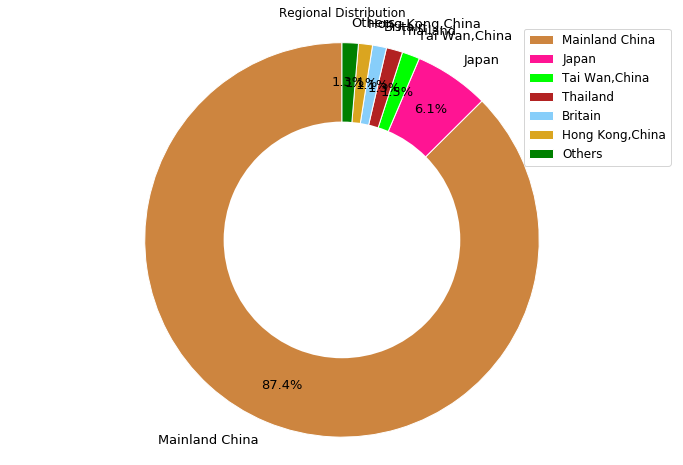

In [7]:
plt.figure(figsize=(12,8))
plt.pie(sorted_drama_area['count'] ,labels = sorted_drama_area['area'],colors = ['peru', 'deeppink', 'lime','firebrick', 'lightskyblue', 'goldenrod', 'green', 'lightslategray', 'greenyellow','purple'], autopct='%1.1f%%', pctdistance=0.8, startangle=90, radius = 1,wedgeprops=dict(width=0.6,edgecolor='w'),textprops={'fontsize': 13, 'color': 'k'})
plt.pie([1], radius=0.6,colors='w')
plt.title('Regional Distribution')
plt.axis('equal')
plt.legend(loc='upper right',prop={'size': 12})
plt.show()

In [8]:
def style_calculation(data):
    style_count ={}
    style_correlation = {}
    for each_data in data:
        each_data = str(each_data)
        each_data = each_data[2:-2].replace("'","").split(',')
        each_data = [str.strip(c) for c in each_data]
        if each_data != np.nan:
            for each_id in each_data:
                if each_id not in style_count:
                    style_count[each_id] = 1
                else:
                    style_count[each_id] += 1

                if each_id not in style_correlation:
                    style_correlation[each_id] ={}
                for each_correlation in each_data:
                    if each_correlation ==  each_id:
                        continue
                    elif each_correlation not in style_correlation[each_id]:
                        style_correlation[each_id][each_correlation] = 1
                    else:
                        style_correlation[each_id][each_correlation] += 1
    style_value_count = np.array([i for i in style_count.values()]).sum()
    return style_count,style_correlation, style_value_count

In [9]:
CM_style_count,CM_style_correlation,CM_style_value_count = style_calculation(drama_information[drama_information['area'] == 'Mainland China']['style'].values)
J_style_count,J_style_correlation,J_style_value_count = style_calculation(drama_information[drama_information['area'] == 'Japan']['style'].values)

([], <a list of 0 Text yticklabel objects>)

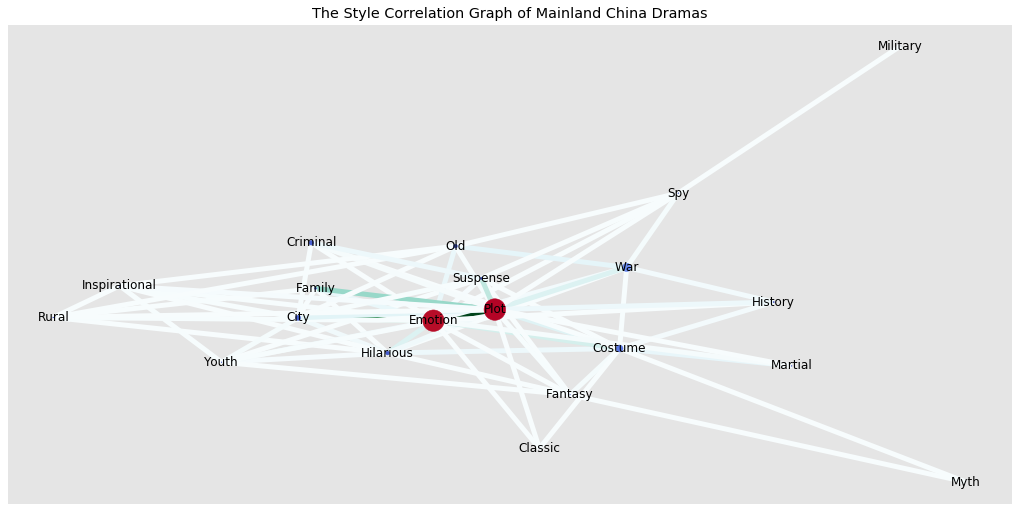

In [10]:
fig= plt.figure(figsize=(18,30))
plt.style.use('ggplot')
cm_drama = []
num_max = 5
for (style,style_relationship) in CM_style_correlation.items():
    for (style_style, num) in style_relationship.items():
        if num >= num_max:
            cm_drama.append([style,style_style,num])
cm_style_correlation_graph = nx.Graph()
cm_style_correlation_graph.add_weighted_edges_from(cm_drama)
pos=nx.spring_layout(cm_style_correlation_graph)
node_color = [100*(10*CM_style_count[v]/CM_style_value_count)**3 for v in cm_style_correlation_graph]
node_size = [100*(10*CM_style_count[v]/CM_style_value_count)**3 for v in cm_style_correlation_graph]
edge_color = [d['weight']**2 for (u , v , d) in cm_style_correlation_graph.edges(data=True)]
plt.subplot(311)
nx.draw_networkx_nodes(cm_style_correlation_graph, pos,node_size=node_size,node_color=node_color,cmap=plt.cm.coolwarm)
nx.draw_networkx_edges(cm_style_correlation_graph, pos, edge_color=edge_color ,edge_cmap=plt.cm.BuGn,width = 5)
nx.draw_networkx_labels(cm_style_correlation_graph, pos, font_size = 12)
plt.title('The Style Correlation Graph of Mainland China Dramas')
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

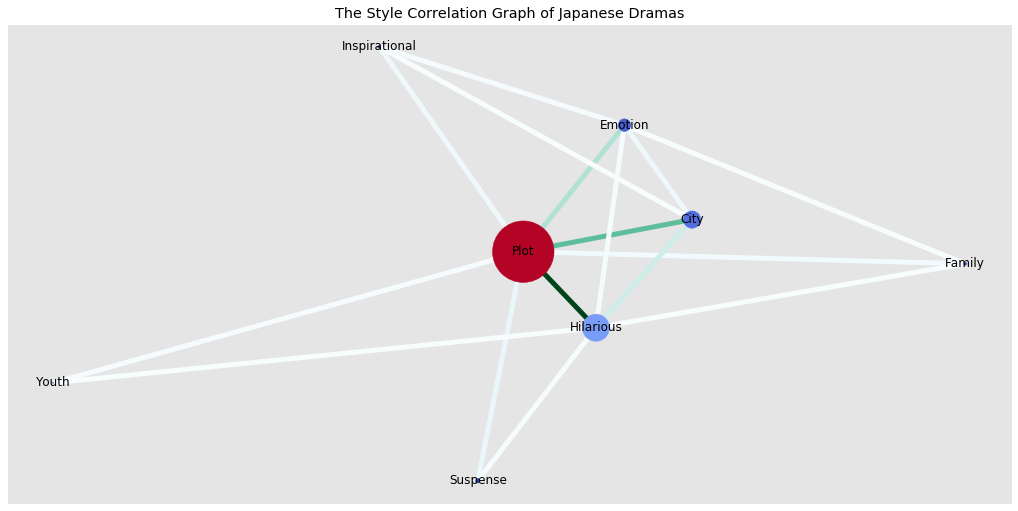

In [12]:
fig= plt.figure(figsize=(18,30))
plt.style.use('ggplot')
j_drama = []
num_max = 5
for (style,style_relationship) in J_style_correlation.items():
    for (style_style, num) in style_relationship.items():
        if num >= num_max:
            j_drama.append([style,style_style,num])
j_style_correlation_graph = nx.Graph()
j_style_correlation_graph.add_weighted_edges_from(j_drama)
pos=nx.spring_layout(j_style_correlation_graph)
node_color = [100*(10*J_style_count[v]/J_style_value_count)**3 for v in j_style_correlation_graph]
node_size = [100*(10*J_style_count[v]/J_style_value_count)**3 for v in j_style_correlation_graph]
edge_color = [d['weight']**2 for (u , v , d) in j_style_correlation_graph.edges(data=True)]
plt.subplot(311)
nx.draw_networkx_nodes(j_style_correlation_graph, pos,node_size=node_size,node_color=node_color,cmap=plt.cm.coolwarm)
nx.draw_networkx_edges(j_style_correlation_graph, pos, edge_color=edge_color ,edge_cmap=plt.cm.BuGn,width = 5)
nx.draw_networkx_labels(j_style_correlation_graph, pos, font_size = 12)
plt.title('The Style Correlation Graph of Japanese Dramas')
plt.xticks([])
plt.yticks([])

In [13]:
cm_drama_information = drama_information[(drama_information['area']=='Mainland China')]

In [14]:
select_data = cm_drama_information[['area','coins','years']]
select_data.columns = ['area','count','years']

In [15]:
style_list = []
for each_area in [CM_style_count]:
    style_list.extend(dict(sorted(each_area.items(), key=lambda d: d[1])[-4:]).keys())
style_set = set(style_list)

In [16]:
select_data_graph = pd.pivot_table(select_data,index= 'years', columns= 'area', aggfunc={'count':'count'})

<Figure size 1296x2160 with 0 Axes>

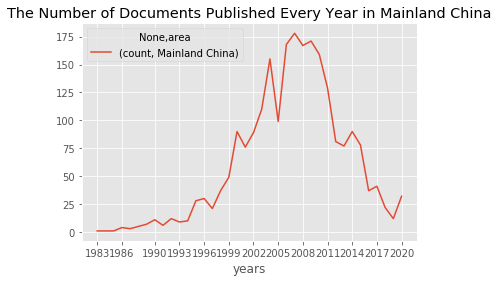

In [17]:
fig= plt.figure(figsize=(18,30))
select_data_graph.plot(title ='The Number of Documents Published Every Year in Mainland China', xticks=select_data_graph.index[::3])

In [18]:
drama_information['coins']

0       427151
1        19745
2        41478
3        37788
4        36843
         ...  
2615        25
2616         0
2617         1
2618         3
2619         0
Name: coins, Length: 2620, dtype: int64

In [41]:
drama_information['favourites'].sort_values()

273           0
2419          3
2460          8
2433          9
2463         10
         ...   
14       413572
6        416484
12       552934
5        632701
0       2081899
Name: favourites, Length: 2620, dtype: int64

Text(0.5, 1.0, 'The scatter plot of views and favourites')

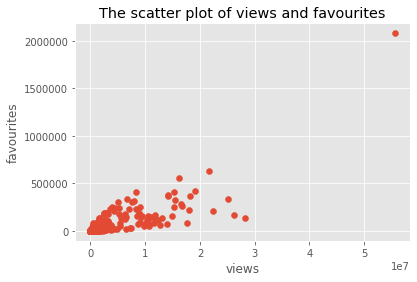

In [44]:
plt.scatter(drama_information['views'],drama_information['favourites'])
plt.xlabel('views')
plt.ylabel('favourites')
plt.title('The scatter plot of views and favourites')

In [47]:
drama_information = drama_information.drop(index = 0)

Text(0.5, 1.0, 'The scatter plot of views and favourites')

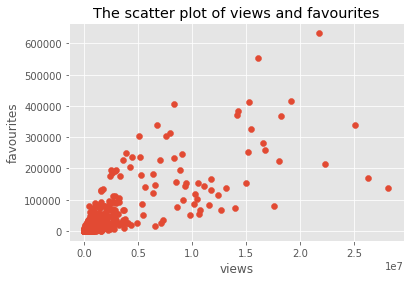

In [48]:
plt.scatter(drama_information['views'],drama_information['favourites'])
plt.xlabel('views')
plt.ylabel('favourites')
plt.title('The scatter plot of views and favourites')

In [60]:
new_drama_information = drama_information.groupby('years').agg([np.sum, np.mean, np.std])

Text(0.5, 1.0, 'the average views of TV dramas these years')

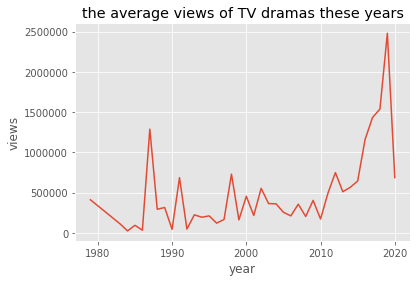

In [77]:
plt.plot(new_drama_information.index, new_drama_information['views']['mean'])
plt.xlabel('year')
plt.ylabel('views')
plt.title('the average views of TV dramas these years')

Text(0.5, 1.0, 'the average coins of TV dramas these years')

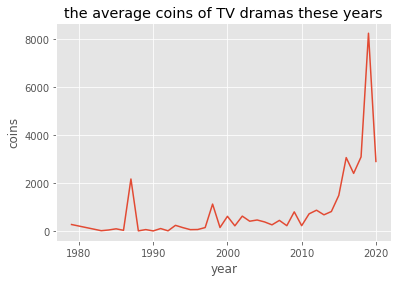

In [78]:
plt.plot(new_drama_information.index, new_drama_information['coins']['mean'])
plt.xlabel('year')
plt.ylabel('coins')
plt.title('the average coins of TV dramas these years')

Text(0.5, 1.0, 'the average danmakus of TV dramas these years')

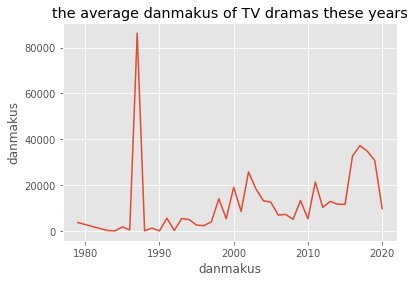

In [79]:
plt.plot(new_drama_information.index, new_drama_information['danmakus']['mean'])
plt.xlabel('danmakus')
plt.ylabel('danmakus')
plt.title('the average danmakus of TV dramas these years')

Text(0.5, 1.0, 'the average favourites of TV dramas these years')

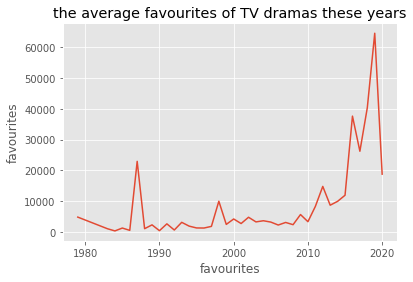

In [80]:
plt.plot(new_drama_information.index, new_drama_information['favourites']['mean'])
plt.xlabel('favourites')
plt.ylabel('favourites')
plt.title('the average favourites of TV dramas these years')

In [90]:
drama_information[drama_information['years']==1987]

,title,area,years,style,views,coins,danmakus,favourites,season_id
67,聊斋,Mainland China,1987,['Costume'],3726895,6383,255049,66414,23555
906,家春秋,Mainland China,1987,"['War', 'Emotion', 'Old']",131773,150,3620,2208,20818
2510,秋白之死,Mainland China,1987,"['Plot', 'War']",6263,12,8,72,29143
